# Box and whisker plots for team and driver pace

This creates two box-and-whisker plots illustrating the range of observed race
pace for teams and drivers across the 2025 Saudi Arabia GP.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

# Define variables
race = 'Miami'
season = 2025

## Load data

In [2]:
race = fastf1.get_session(season, race, 'R')
race.load()
laps = race.laps.pick_quicklaps()

req         WARNING 	DEFAULT CACHE ENABLED! (4.65 GB) /Users/mjbernha/Library/Caches/fastf1
core           INFO 	Loading data for Miami Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 81 completed the race distance 00:00.036000 before the recorded end of the session.
core           INFO 	Finished loadin

In [3]:
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:58:51.257000,VER,1,0 days 00:01:35.669000,1.0,NaN,NaT,NaT,NaT,0 days 00:00:34.681000,...,True,Red Bull Racing,0 days 00:57:15.384000,2025-05-04 20:03:42.225,12,2.0,False,,False,False
3,0 days 01:04:20.900000,VER,1,0 days 00:01:32.569000,4.0,NaN,NaT,NaT,0 days 00:00:31.185000,0 days 00:00:35.126000,...,True,Red Bull Racing,0 days 01:02:48.331000,2025-05-04 20:09:15.172,1,1.0,False,,False,True
4,0 days 01:05:53.033000,VER,1,0 days 00:01:32.133000,5.0,NaN,NaT,NaT,0 days 00:00:31.182000,0 days 00:00:34.799000,...,True,Red Bull Racing,0 days 01:04:20.900000,2025-05-04 20:10:47.741,1,1.0,False,,False,True
5,0 days 01:07:25.129000,VER,1,0 days 00:01:32.096000,6.0,NaN,NaT,NaT,0 days 00:00:31.075000,0 days 00:00:34.815000,...,True,Red Bull Racing,0 days 01:05:53.033000,2025-05-04 20:12:19.874,1,1.0,False,,False,True
6,0 days 01:08:57.212000,VER,1,0 days 00:01:32.083000,7.0,NaN,NaT,NaT,0 days 00:00:31.076000,0 days 00:00:34.867000,...,True,Red Bull Racing,0 days 01:07:25.129000,2025-05-04 20:13:51.970,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0 days 01:34:12.883000,BEA,87,0 days 00:01:33.088000,23.0,NaN,NaT,NaT,0 days 00:00:31.179000,0 days 00:00:35.510000,...,True,Haas F1 Team,0 days 01:32:39.795000,2025-05-04 20:39:06.636,1,13.0,False,,False,True
1000,0 days 01:35:45.563000,BEA,87,0 days 00:01:32.680000,24.0,1.0,NaT,NaT,0 days 00:00:31.083000,0 days 00:00:35.480000,...,True,Haas F1 Team,0 days 01:34:12.883000,2025-05-04 20:40:39.724,1,12.0,False,,False,True
1001,0 days 01:37:18.617000,BEA,87,0 days 00:01:33.054000,25.0,1.0,NaT,NaT,0 days 00:00:31.073000,0 days 00:00:35.848000,...,True,Haas F1 Team,0 days 01:35:45.563000,2025-05-04 20:42:12.404,1,12.0,False,,False,True
1002,0 days 01:38:52.757000,BEA,87,0 days 00:01:34.140000,26.0,1.0,NaT,NaT,0 days 00:00:32.323000,0 days 00:00:35.617000,...,True,Haas F1 Team,0 days 01:37:18.617000,2025-05-04 20:43:45.458,1,12.0,False,,False,True


## Transform data

From the reference example:

> Convert the lap time column from timedelta to integer. This is a seaborn-specific modification. If plotting with matplotlib, set mpl_timedelta_support to true with plotting.setup_mpl.

In [4]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

transformed_laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTime (s)
0,0 days 00:58:51.257000,VER,1,0 days 00:01:35.669000,1.0,NaN,NaT,NaT,NaT,0 days 00:00:34.681000,...,Red Bull Racing,0 days 00:57:15.384000,2025-05-04 20:03:42.225,12,2.0,False,,False,False,95.669
3,0 days 01:04:20.900000,VER,1,0 days 00:01:32.569000,4.0,NaN,NaT,NaT,0 days 00:00:31.185000,0 days 00:00:35.126000,...,Red Bull Racing,0 days 01:02:48.331000,2025-05-04 20:09:15.172,1,1.0,False,,False,True,92.569
4,0 days 01:05:53.033000,VER,1,0 days 00:01:32.133000,5.0,NaN,NaT,NaT,0 days 00:00:31.182000,0 days 00:00:34.799000,...,Red Bull Racing,0 days 01:04:20.900000,2025-05-04 20:10:47.741,1,1.0,False,,False,True,92.133
5,0 days 01:07:25.129000,VER,1,0 days 00:01:32.096000,6.0,NaN,NaT,NaT,0 days 00:00:31.075000,0 days 00:00:34.815000,...,Red Bull Racing,0 days 01:05:53.033000,2025-05-04 20:12:19.874,1,1.0,False,,False,True,92.096
6,0 days 01:08:57.212000,VER,1,0 days 00:01:32.083000,7.0,NaN,NaT,NaT,0 days 00:00:31.076000,0 days 00:00:34.867000,...,Red Bull Racing,0 days 01:07:25.129000,2025-05-04 20:13:51.970,1,1.0,False,,False,True,92.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0 days 01:34:12.883000,BEA,87,0 days 00:01:33.088000,23.0,NaN,NaT,NaT,0 days 00:00:31.179000,0 days 00:00:35.510000,...,Haas F1 Team,0 days 01:32:39.795000,2025-05-04 20:39:06.636,1,13.0,False,,False,True,93.088
1000,0 days 01:35:45.563000,BEA,87,0 days 00:01:32.680000,24.0,1.0,NaT,NaT,0 days 00:00:31.083000,0 days 00:00:35.480000,...,Haas F1 Team,0 days 01:34:12.883000,2025-05-04 20:40:39.724,1,12.0,False,,False,True,92.680
1001,0 days 01:37:18.617000,BEA,87,0 days 00:01:33.054000,25.0,1.0,NaT,NaT,0 days 00:00:31.073000,0 days 00:00:35.848000,...,Haas F1 Team,0 days 01:35:45.563000,2025-05-04 20:42:12.404,1,12.0,False,,False,True,93.054
1002,0 days 01:38:52.757000,BEA,87,0 days 00:01:34.140000,26.0,1.0,NaT,NaT,0 days 00:00:32.323000,0 days 00:00:35.617000,...,Haas F1 Team,0 days 01:37:18.617000,2025-05-04 20:43:45.458,1,12.0,False,,False,True,94.140


In [5]:
# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

req            INFO 	Using cached data for driver_info


Index(['McLaren', 'Williams', 'Red Bull Racing', 'Mercedes', 'Ferrari',
       'Alpine', 'Aston Martin', 'Haas F1 Team', 'Racing Bulls',
       'Kick Sauber'],
      dtype='object', name='Team')


In [6]:
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

Index(['PIA', 'RUS', 'NOR', 'ALB', 'SAI', 'TSU', 'HAD', 'VER', 'ANT', 'OCO',
       'HAM', 'LEC', 'STR', 'GAS', 'ALO', 'HUL', 'BOR', 'BEA', 'LAW'],
      dtype='object', name='Driver')


## Generate plots

There will be two plots.

The first will group lap times by team. One thing to remember about this plot is
that two teams - Red Bull and Alpine - had drivers retire after a first-lap
collision.

This results in a slight distortion to the output, because the number of data
points for those teams is half what they are for the other eight teams.

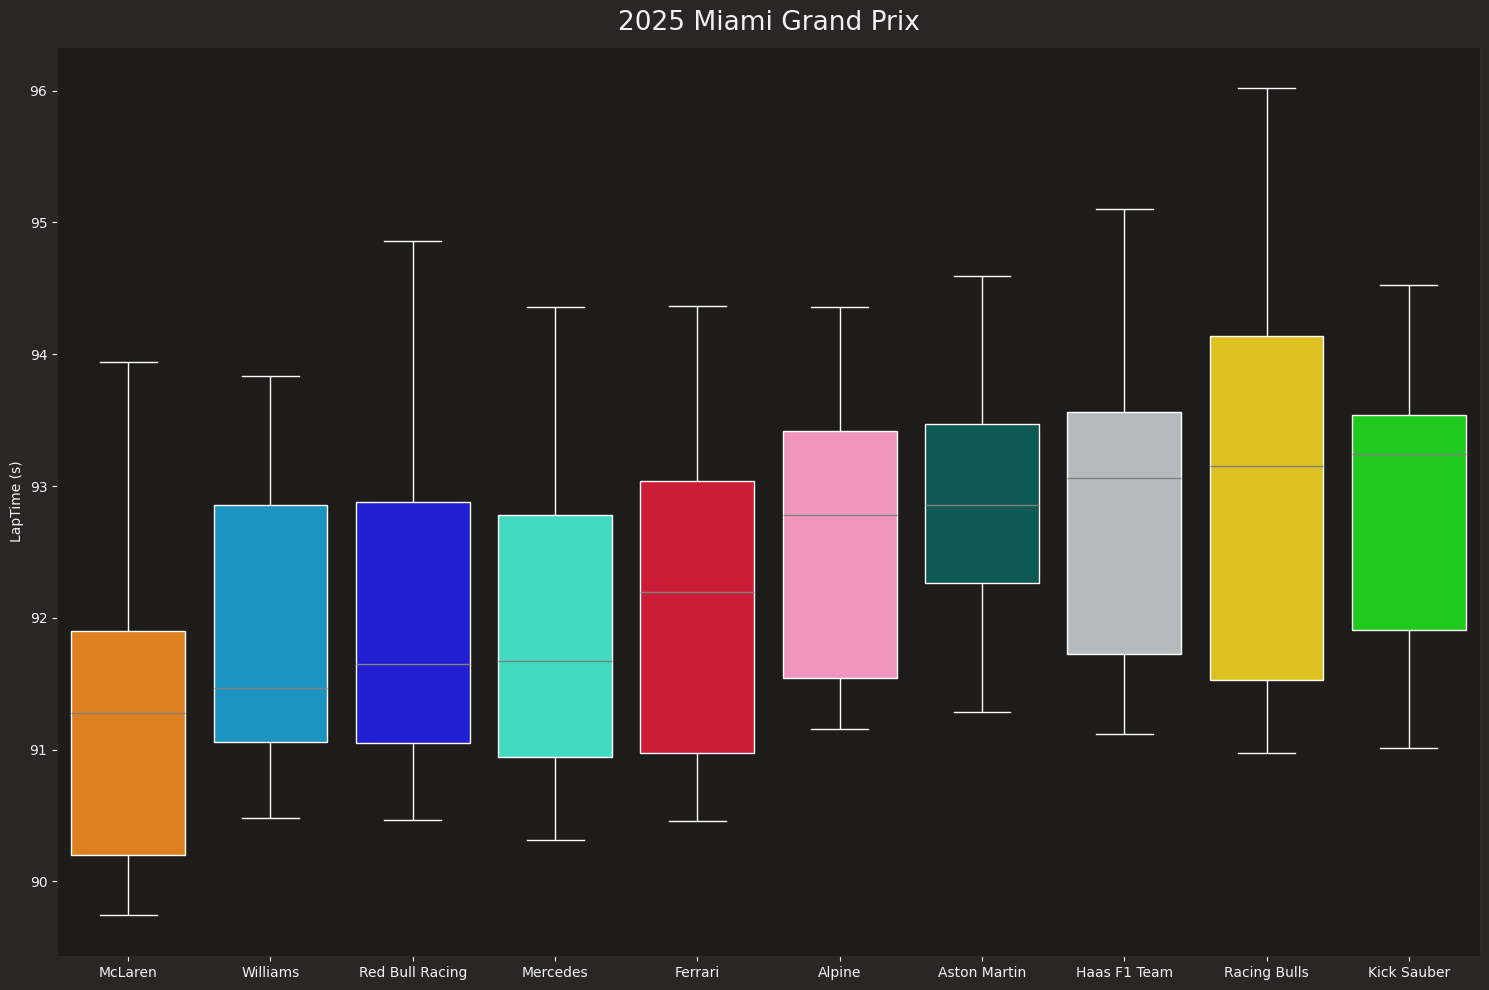

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2025 Miami Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

The second plot is separated by driver. As before, there are only 18 drivers
because two drivers (Tsunoda and Gasly) retired after a first-lap collision.

It is interesting to note that the order of drivers in this plot does not match
the finishing order in the race.

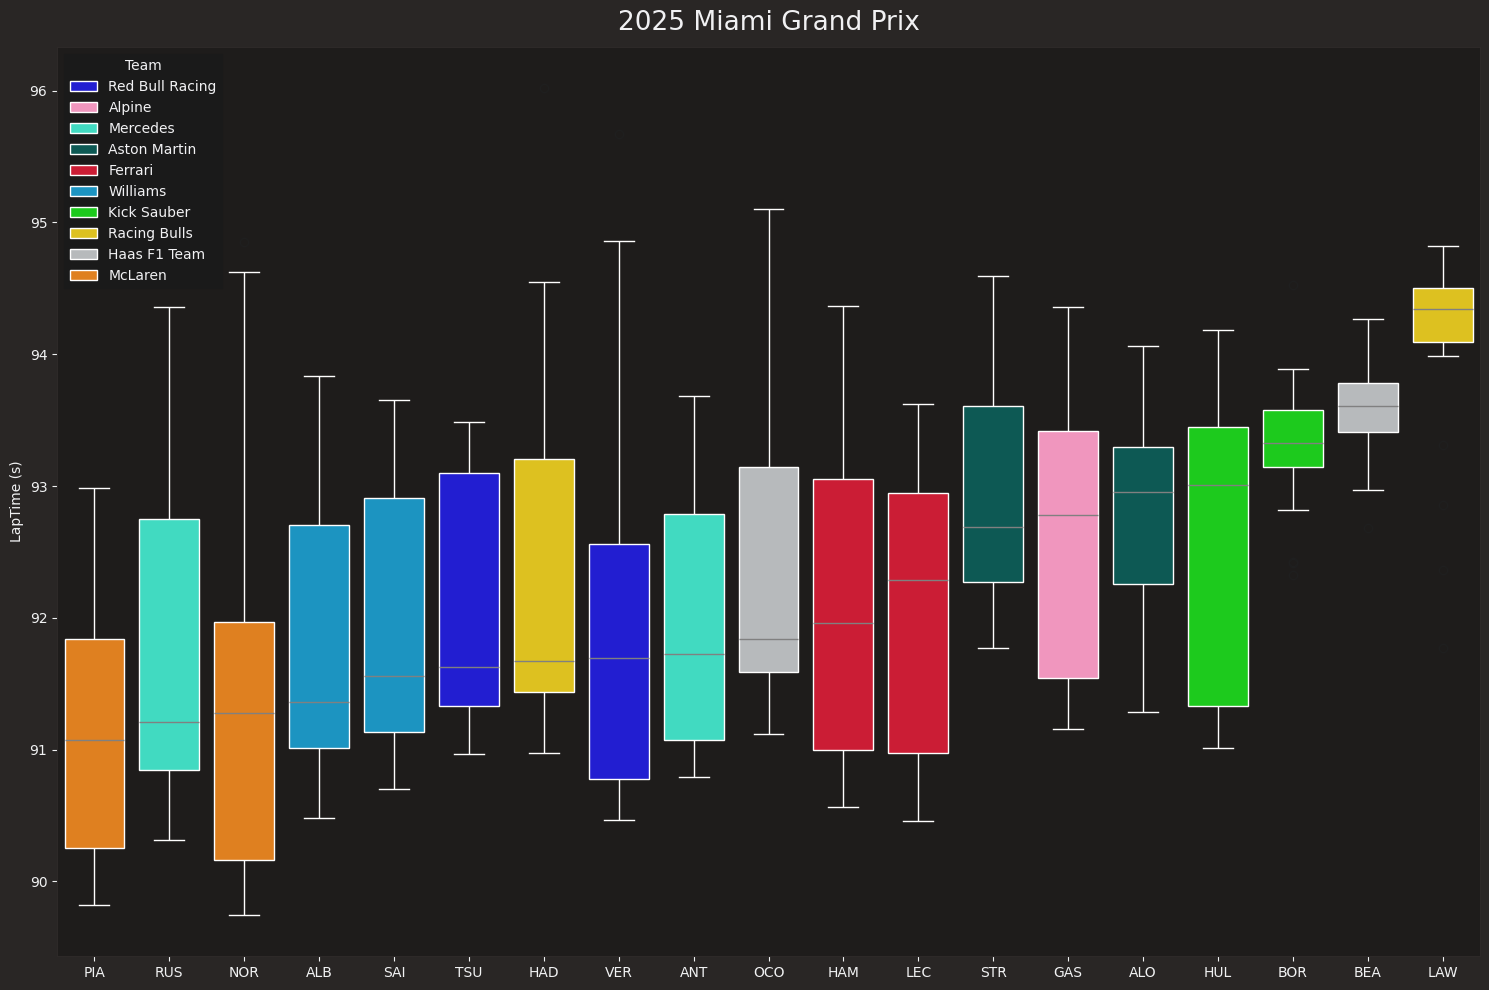

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Team",
    order=driver_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2025 Miami Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

Here is a comparison of the drivers' order in the plot, compared to their order
on track:

| Driver     | Race | Plot | Difference |
|------------|------|------|------------|
| Piastri    | 1    | 1    | -          |
| Norris     | 2    | 3    | -1         |
| Russell    | 3    | 2    | +1         |
| Verstappen | 4    | 8    | -4         |
| Albon      | 5    | 4    | +1         |
| Antonelli  | 6    | 9    | -3         |
| Leclerc    | 7    | 12   | -5         |
| Hamilton   | 8    | 11   | -3         |
| Sainz      | 9    | 5    | +4         |
| Tsunoda    | 10   | 6    | +4         |
| Hadjar     | 11   | 7    | +4         |
| Ocon       | 12   | 10   | +2         |
| Gasly      | 13   | 14   | -1         |
| Hulkenberg | 14   | 16   | -2         |
| Alonso     | 15   | 15   | -          |
| Stroll     | 16   | 13   | +3         |
| Lawson     | NC   | 19   | na         |
| Bortoleto  | NC   | 17   | na         |
| Bearman    | NC   | 18   | na         |
| Doohan     | NC   | -    | na         |

---

This is the end of the notebook.